# 📌 Project Overview
This project analyzes a direct marketing campaign conducted by a Portuguese banking institution. The data contains client information and details of past marketing contacts, with the goal of predicting whether a client will subscribe to a term deposit (y = yes/no). This is a binary classification problem involving both categorical and numerical features, with class imbalance (majority of clients did not subscribe).

The dataset includes:

- Demographic data (age, job, marital status, etc.)

- Contact data (communication type, date, duration)

- Campaign performance indicators (number of contacts, previous outcomes)

- Economic indicators (employment variation rate, consumer confidence, Euribor, etc.)

# 🎯 Objective
The primary objectives of this project are:

- 🧹 Clean and preprocess the dataset (handle categorical variables, scale numerical features)

- 📊 Explore and visualize patterns in the data (EDA)

- 🧠 Build classification models (e.g. logistic regression, decision trees, or ensemble methods)

- ⚖️ Address class imbalance using techniques like SMOTE or class weighting

- 📈 Evaluate model performance using precision, recall, F1-score, and confusion matrix

- ✅ Identify key features influencing term deposit subscription

## 📂 Data Source

This dataset was obtained from the [UCI Machine Learning Repository - Bank Marketing Dataset](https://archive.ics.uci.edu/dataset/222/bank+marketing).  
It contains information collected from a Portuguese banking institution related to direct marketing campaigns.

Citation:
Moro, S., Cortez, P., & Rita, P. (2014). A Data-Driven Approach to Predict the Success of Bank Telemarketing. *Decision Support Systems, 62*, 22-31.


# Load Files

In [36]:
# load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [37]:
bank = pd.read_csv('Data/bank-additional/bank-additional-full.csv', sep=';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# 🧭 Step-by-Step EDA Section

### 1. Dataset Overview

In [38]:
bank.shape

(41188, 21)

In [39]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [40]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### 2. Target Variable Distribution (Subscription: y)


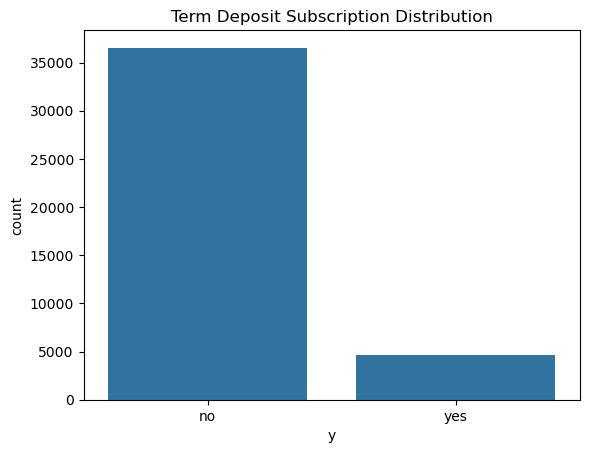

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

In [41]:
sns.countplot(x='y', data=bank)
plt.title("Term Deposit Subscription Distribution")
plt.show()

bank['y'].value_counts(normalize=True)

### 3. Distribution of Numeric Variables

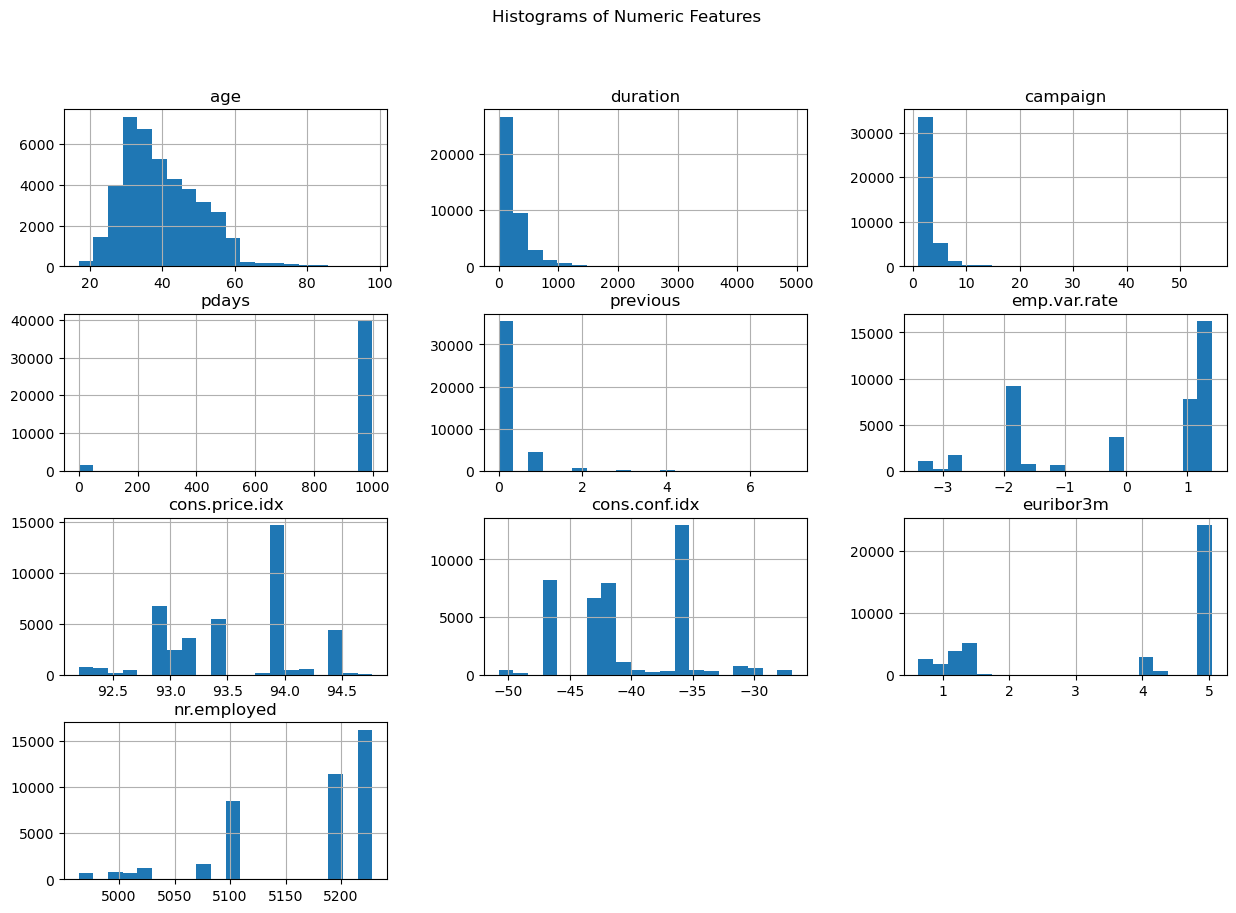

In [42]:
numeric_cols = bank.select_dtypes(include=['int64', 'float64']).columns
bank[numeric_cols].hist(bins=20, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")

plt.show()

### 4. Distribution of Categorical Variables

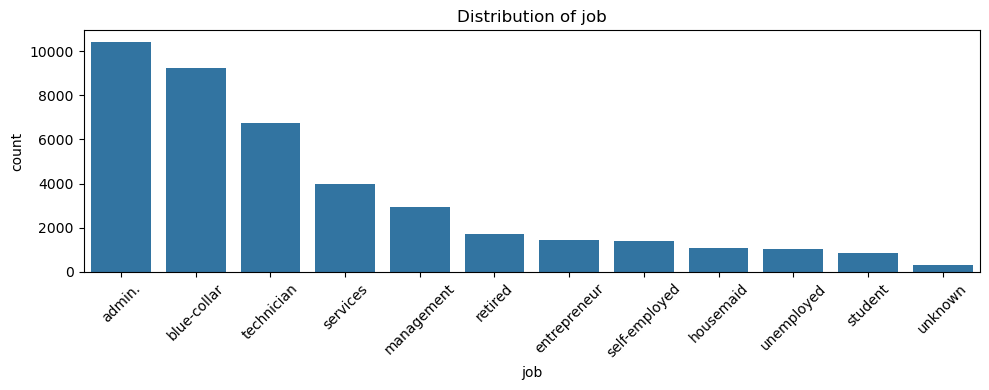

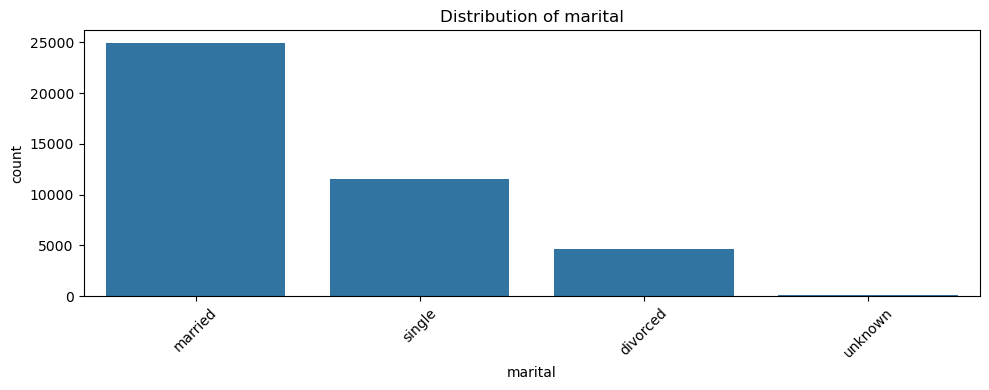

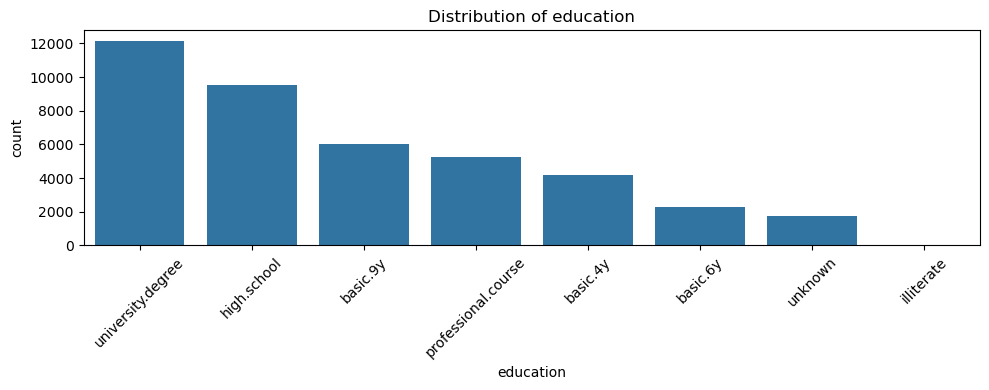

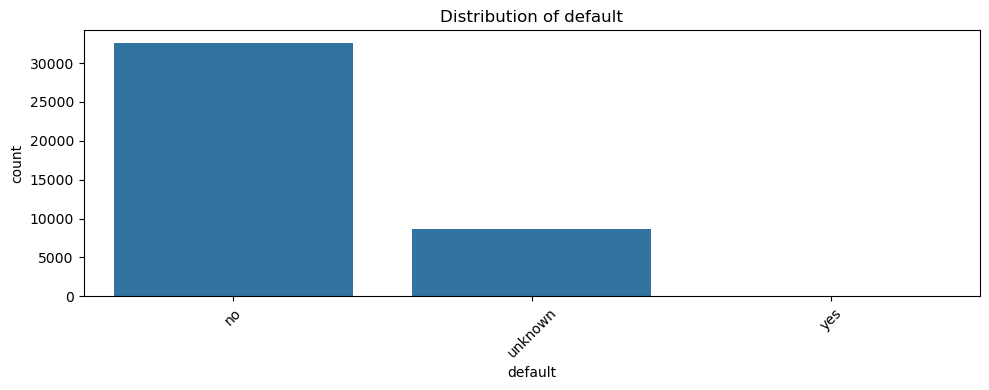

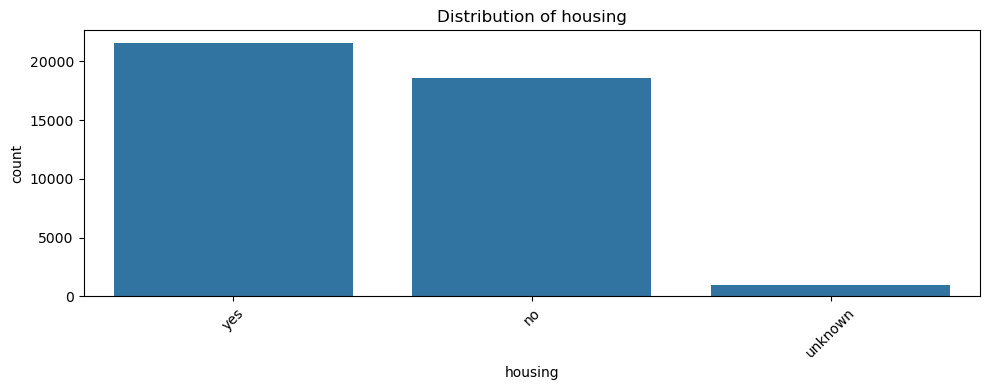

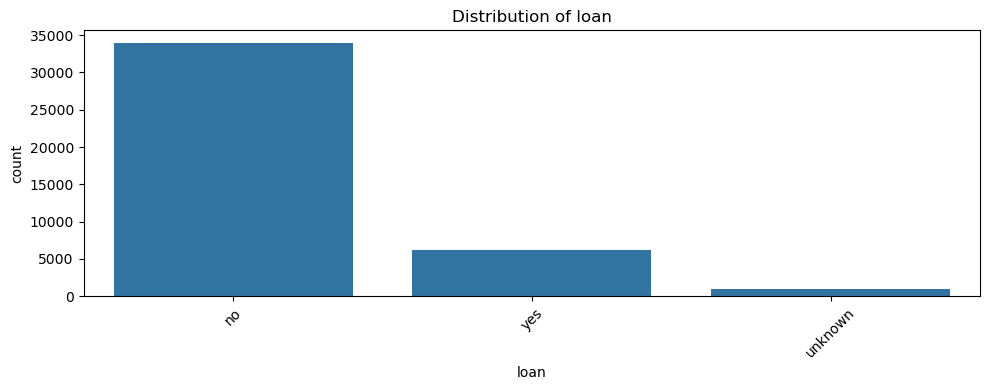

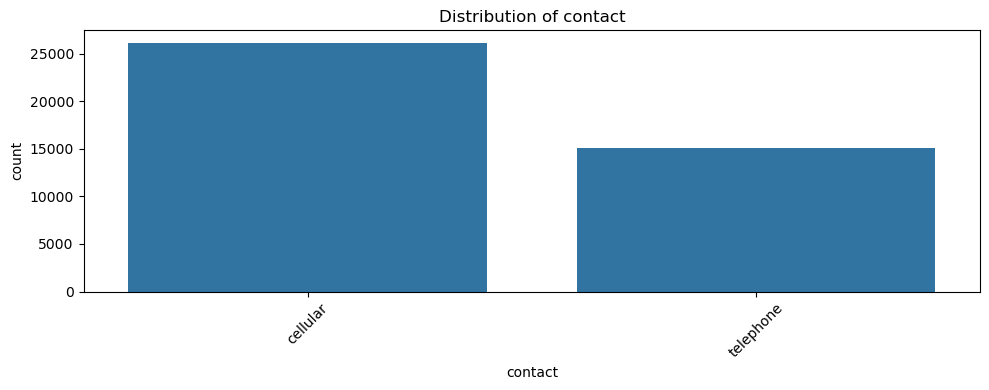

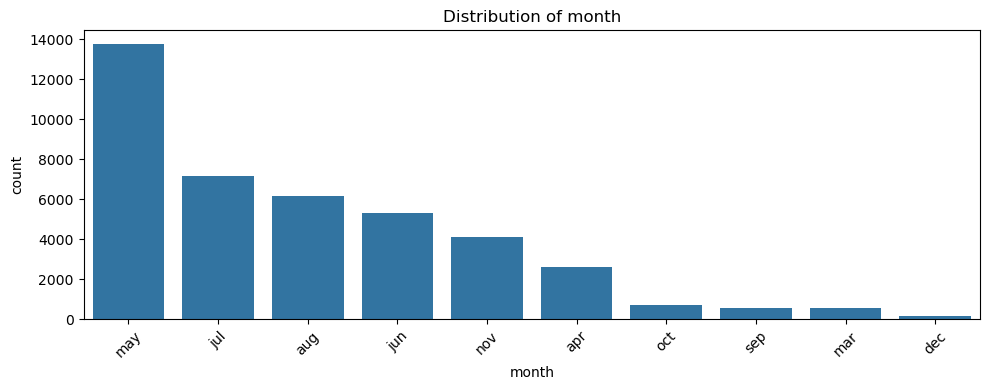

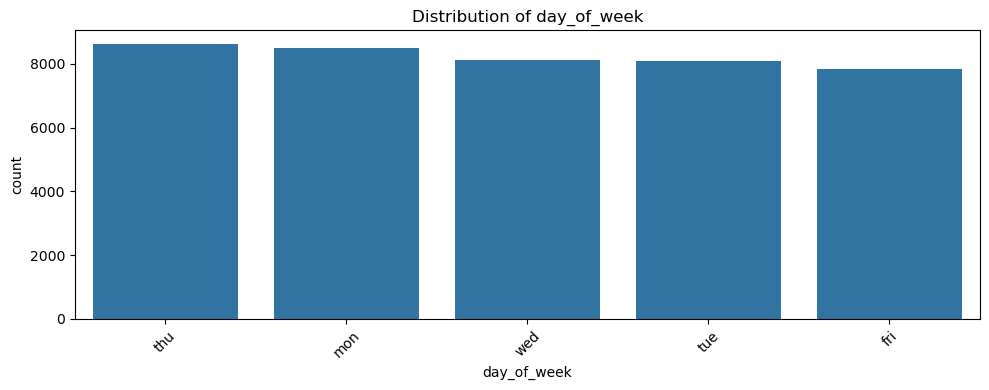

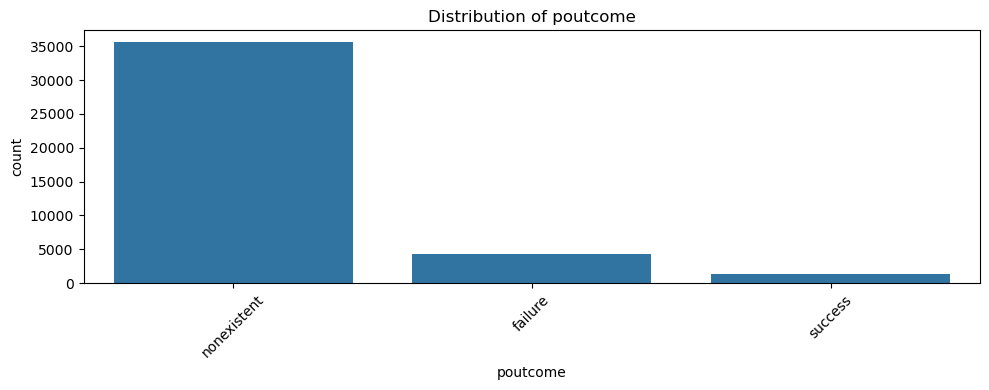

In [43]:
categorical_cols = bank.select_dtypes(include='object').columns.drop('y')

for col in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col, data=bank, order=bank[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

### 5. Categorical Variables vs Target (y)

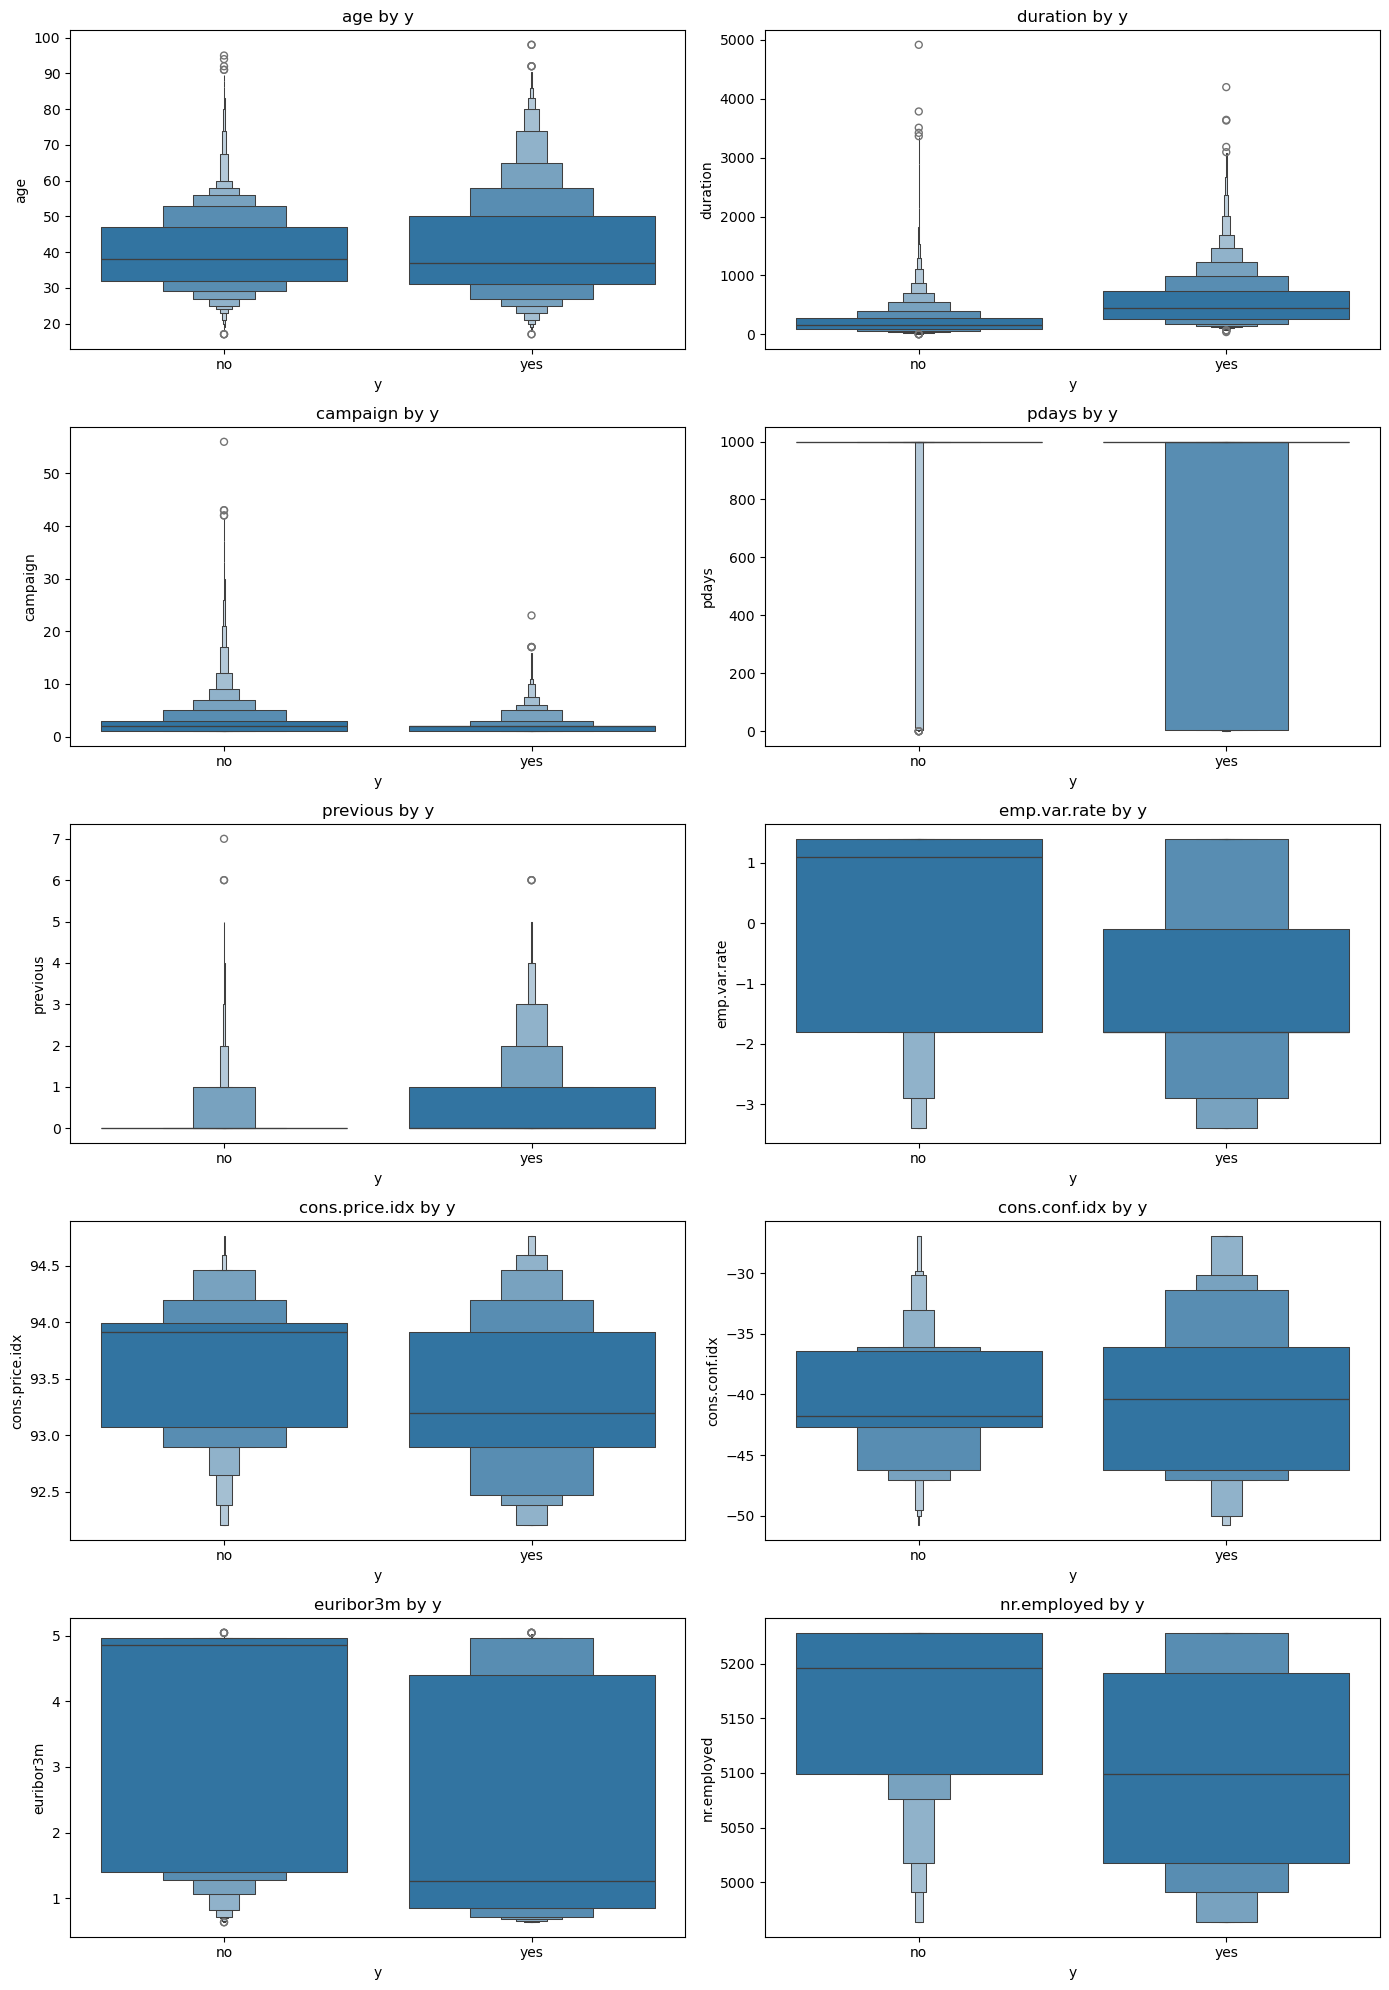

In [44]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))
axes = axes.flatten()

# enumerate(): 在遍历时同时获得index, element，非常适合像下面这种要在 subplot 中编号的场景：
for i, col in enumerate(numeric_cols[:10]):
    sns.boxenplot(x='y', y=col, data=bank, ax=axes[i])
    axes[i].set_title(f'{col} by y')

plt.tight_layout()
plt.show()

# for col in categorical_cols:
#     plt.figure(nrows=5, ncols=2, figsize=(6, 4))
#     sns.boxplot(x='y', y=col, data=bank)
#     plt.title(f'{col} by y')
#     plt.show()

Interpretation for two boxplots (cons.conf.idx消费者信心指数 and emp.var.rate - 就业变化率):

1. cons.conf.idx by y
   - Distribution: ***consumer confidence index*** vs ***Y: Term Deposit Subscription***
   - “Yes” has a higher median value than “No,” indicating that greater consumer confidence is associated with a higher likelihood of subscription.
   - "No" has more outliers, indicating volatility index is bigger
2. emp.var.rate by y:
   - A higher employment variation rate indicates faster economic growth
   - The boxplot for the "no" group is noticeably higher, suggesting that when the job market is strong, consumers are less likely to be persuaded to subscribe to the product - possibly indicating that the product is counter-cyclical

### 7. Correlation of Numerical Variables

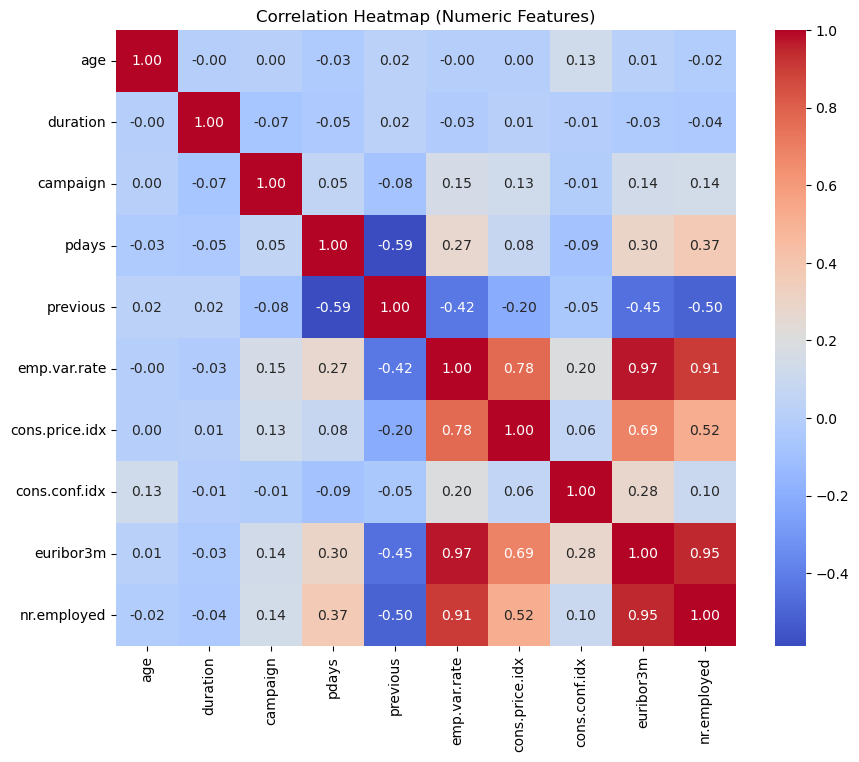

In [45]:
corr = bank[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

# 🧹 Data Processing

# 🧠 Project Workflow: Imbalanced Classification (XGBoost + SMOTE + StratifiedKFold)

1. 📂 **Load & Prepare Data**
   - Read dataset
   - Split features (X) and target (y)

2. 🧪 **Split Train/Test Sets**
   - Use `train_test_split` with `stratify=y`
   - 80% training, 20% testing

3. 🔁 **Cross-Validation on Training Set**
   - Apply **Stratified K-Fold (n=5)** on training set
   - For each fold:
     - 🧬 **Train Fold** → SMOTE (oversample minority class)
     - ⚖️ **StandardScaler** (fit on train fold, transform both train + val)
     - 🚀 Train **XGBoost**
     - 🧾 Evaluate on **Validation Fold** (F1, Recall, ROC AUC)

4. 📊 **Aggregate CV Scores**
   - Average F1 / Recall / ROC AUC over all folds
   - Select best-performing model/config

5. 🏁 **Train Final Model on Full Train Set**
   - Apply SMOTE
   - Fit StandardScaler
   - Train XGBoost

6. 🧪 **Final Evaluation on Test Set**
   - Transform X_test using trained scaler
   - Predict and evaluate (classification report + ROC AUC)

✅ Goal: Build a robust model for imbalanced data and validate its generalization on unseen data.


### Step1. Check if the entire dataset contains 'unknown' or missing values

In [46]:
# Check for string type columns that contain 'unknown'
for col in bank.columns:
    if bank[col].dtype == 'object':
        if 'unknown' in bank[col].unique():
            print(f"{col} contains 'unknown'")

# Checking for missing (NaN) values
missing_summary = bank.isnull().sum()
print(missing_summary[missing_summary > 0])

job contains 'unknown'
marital contains 'unknown'
education contains 'unknown'
default contains 'unknown'
housing contains 'unknown'
loan contains 'unknown'
Series([], dtype: int64)


In [47]:
cols_to_check = ['job', 'marital', 'education', 'default', 'housing', 'loan']

unknown_counts = {col: (bank[col] == 'unknown').sum() for col in cols_to_check}
print(unknown_counts)

{'job': 330, 'marital': 80, 'education': 1731, 'default': 8597, 'housing': 990, 'loan': 990}


In [48]:
# bank.shape: (41188, 21)

data = {
    "Column": ['job', 'marital', 'education', 'default', 'housing', 'loan'],
    "unknown_Count": [330, 80, 1731, 8597, 990, 990],
    "Proportion%": ['0.8%', '0.2%', '4.2%', '20.9%', '2.4%', '2.4%']
}

df = pd.DataFrame(data)

total_rows = pd.DataFrame({
    "Column":['Total Rows'],
    "unknown_Count":[41188],
    "Proportion%":['100%']
})

df_combined = pd.concat([df, total_rows], ignore_index=True)
df_combined

,Column,unknown_Count,Proportion%
0,job,330,0.8%
1,marital,80,0.2%
2,education,1731,4.2%
3,default,8597,20.9%
4,housing,990,2.4%
5,loan,990,2.4%
6,Total Rows,41188,100%


We will replace 'unknown' with 'NaN' (np.nan) in ***default***, ***education*** column. And, we will delete rows that contain 'unknown' in ***job***, ***housing***, ***loan***, and ***marital*** columns.

### Step2. Delete or raplace 'unknown' rows

In [49]:
bank_fill = bank.copy()

# Replace 'unknown' with 'NaN' (np.nan) in default education column
bank_fill[['default', 'education']] = bank_fill[['default', 'education']].replace('unknown', 'missing')

# Delete rows that contain 'unknown' in job, housing, loan, and marital columns.
unknown_cols = ['job', 'housing', 'loan', 'marital']
for col in unknown_cols:
    bank_fill = bank_fill[bank_fill[col] != 'unknown']

### Step3. Separate target and features

In [50]:
X = bank_fill.drop(columns='y')
y = bank_fill['y']

# Convert to 0/1
y = y.map({'yes':1, 'no':0})

### Step4. Separate numeric and categorical

In [51]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

### Step5. Model 1 - XGBoost Modeling

- cross validation
- standardization
- SMOTE
- modeling
- evaluation

In [52]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, roc_auc_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# a). Train-test split
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# b). Clarify numeric columns (needed when standarization)
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# c). Convert any categorical variables to dummy variables - dummy encoding (Only categorical, numeric remain the same)
X_encoded = pd.get_dummies(X_train_full, drop_first=True) # drop_first=True 表示 drop 掉每组类别的第一个 dummy，以防止 multicollinearity
# Remain all dummy variables in order
all_cols = X_encoded.columns.tolist()

# d). Cross-validation - XGBoost
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_scores1, recall_scores1, roc_auc_scores1 = [], [], []

for train_idx, val_idx in skf.split(X_encoded, y_train_full):
    # e). Cross-validation: train vs val
    X_train, y_train = X_encoded.iloc[train_idx].copy(), y_train_full.iloc[train_idx].copy()
    X_val, y_val = X_encoded.iloc[val_idx].copy(), y_train_full.iloc[val_idx].copy()

    # f). Ensure column alignment
    X_train = X_train.reindex(columns=all_cols, fill_value=0)
    X_val = X_val.reindex(columns=all_cols, fill_value=0)

    # g). Separate numeric and dummy
    X_train_num = X_train[numeric_cols]
    X_val_num = X_val[numeric_cols]
    X_train_dummy = X_train.drop(columns=numeric_cols)
    X_val_dummy = X_val.drop(columns=numeric_cols)

    # h). Standardize numeric cols
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train_num)
    X_val_num_scaled = scaler.transform(X_val_num)

    # i). Combined standardized numeric cols with dummy cols
    X_train_final = pd.concat([
        pd.DataFrame(X_train_num_scaled, columns=numeric_cols, index=X_train.index),
        X_train_dummy
    ], axis=1)

    X_val_final = pd.concat([
        pd.DataFrame(X_val_num_scaled, columns=numeric_cols, index=X_val.index),
        X_val_dummy
    ], axis=1)

    # j). Only SMOTE on train fold
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train_final, y_train)

    # k). Modeling
    model1 = XGBClassifier(eval_metric='logloss', random_state=42)
    model1.fit(X_resampled, y_resampled)

    # l). Cross-validation and evaluation
    y_pred = model1.predict(X_val_final)
    y_proba = model1.predict_proba(X_val_final)[:, 1]

    # m). Append evaluated metrics to the list: f1_scores, recall_scores, roc_auc_scores
    f1_scores1.append(f1_score(y_val, y_pred))
    recall_scores1.append(recall_score(y_val, y_pred))
    roc_auc_scores1.append(roc_auc_score(y_val, y_proba))

    # print(f"Avg F1 Score: {np.mean(f1_scores):.4f}")
    # print(f"Avg Recall Score: {np.mean(recall_scores):.4f}")
    # print(f"Avg ROC AUC: {np.mean(roc_auc_scores):.4f}")
    # print("\n")
    
# Print classification static results: F1, Recall, ROC_AUC
print("---------------------------------------------")
print("XGBoost Classification Average Static Results")
print("---------------------------------------------")
print(f"Avg F1 Score: {np.mean(f1_scores1):.4f}")
print(f"Avg Recall Score: {np.mean(recall_scores1):.4f}")
print(f"Avg ROC AUC: {np.mean(roc_auc_scores1):.4f}")

---------------------------------------------
XGBoost Classification Average Static Results
---------------------------------------------
Avg F1 Score: 0.6111
Avg Recall Score: 0.6479
Avg ROC AUC: 0.9415


### 🧮 Step6: Model 2 - Random Forest Modeling

In [53]:
from sklearn.ensemble import RandomForestClassifier

# d). Cross-validation - Random Forest
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_scores2, recall_scores2, roc_auc_scores2 = [], [], []

for train_idx, val_idx in skf.split(X_encoded, y_train_full):
    # e). Cross-validation: train vs val
    X_train, y_train = X_encoded.iloc[train_idx].copy(), y_train_full.iloc[train_idx].copy()
    X_val, y_val = X_encoded.iloc[val_idx].copy(), y_train_full.iloc[val_idx].copy()

    # f). Ensure column alignment
    X_train = X_train.reindex(columns=all_cols, fill_value=0)
    X_val = X_val.reindex(columns=all_cols, fill_value=0)

    # g). Separate numeric and dummy
    X_train_num = X_train[numeric_cols]
    X_val_num = X_val[numeric_cols]
    X_train_dummy = X_train.drop(columns=numeric_cols)
    X_val_dummy = X_val.drop(columns=numeric_cols)

    # h). Standardize numeric cols
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train_num)
    X_val_num_scaled = scaler.transform(X_val_num)

    # i). Combined standardized numeric cols with dummy cols
    X_train_final = pd.concat([
        pd.DataFrame(X_train_num_scaled, columns=numeric_cols, index=X_train.index),
        X_train_dummy
    ], axis=1)

    X_val_final = pd.concat([
        pd.DataFrame(X_val_num_scaled, columns=numeric_cols, index=X_val.index),
        X_val_dummy
    ], axis=1)

    # j). Only SMOTE on train fold
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train_final, y_train)

    # k). Modeling
    model2 = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, n_jobs=1)
    model2.fit(X_resampled, y_resampled)

    # l). Cross-validation and evaluation
    # returns the predicted class labels (0 or 1) for the validation set.
    y_pred2 = model2.predict(X_val_final)
    # gives the predicted probability of class 1 (i.e., how likely a client will subscribe).
    y_proba2 = model2.predict_proba(X_val_final)[:, 1] # if y_proba2 = 0.91, the model believes there's a 91% chance this client will subscribe.

    # m). Append evaluated metrics to the list: f1_scores, recall_scores, roc_auc_scores
    f1_scores2.append(f1_score(y_val, y_pred2))
    recall_scores2.append(recall_score(y_val, y_pred2))
    roc_auc_scores2.append(roc_auc_score(y_val, y_proba2))

    # print(f"Avg F1 Score: {np.mean(f1_scores):.4f}")
    # print(f"Avg Recall Score: {np.mean(recall_scores):.4f}")
    # print(f"Avg ROC AUC: {np.mean(roc_auc_scores):.4f}")
    # print("\n")
    
# Print classification static results: F1, Recall, ROC_AUC
print("--------------------------------------")
print("Random Forest - Average Static Results")
print("--------------------------------------")
print(f"Avg F1 Score: {np.mean(f1_scores2):.4f}")
print(f"Avg Recall Score: {np.mean(recall_scores2):.4f}")
print(f"Avg ROC AUC: {np.mean(roc_auc_scores2):.4f}")

--------------------------------------
Random Forest - Average Static Results
--------------------------------------
Avg F1 Score: 0.6247
Avg Recall Score: 0.6875
Avg ROC AUC: 0.9411


### Step7: Model 3 - Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

# d). Cross-validation - Random Forest
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_scores3, recall_scores3, roc_auc_scores3 = [], [], []

for train_idx, val_idx in skf.split(X_encoded, y_train_full):
    # e). Cross-validation: train vs val
    X_train, y_train = X_encoded.iloc[train_idx].copy(), y_train_full.iloc[train_idx].copy()
    X_val, y_val = X_encoded.iloc[val_idx].copy(), y_train_full.iloc[val_idx].copy()

    # f). Ensure column alignment
    X_train = X_train.reindex(columns=all_cols, fill_value=0)
    X_val = X_val.reindex(columns=all_cols, fill_value=0)

    # g). Separate numeric and dummy
    X_train_num = X_train[numeric_cols]
    X_val_num = X_val[numeric_cols]
    X_train_dummy = X_train.drop(columns=numeric_cols)
    X_val_dummy = X_val.drop(columns=numeric_cols)

    # h). Standardize numeric cols
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train_num)
    X_val_num_scaled = scaler.transform(X_val_num)

    # i). Combined standardized numeric cols with dummy cols
    X_train_final = pd.concat([
        pd.DataFrame(X_train_num_scaled, columns=numeric_cols, index=X_train.index),
        X_train_dummy
    ], axis=1)

    X_val_final = pd.concat([
        pd.DataFrame(X_val_num_scaled, columns=numeric_cols, index=X_val.index),
        X_val_dummy
    ], axis=1)

    # j). Only SMOTE on train fold
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train_final, y_train)

    # k). Modeling
    model3 = LogisticRegression(max_iter=1000, random_state=42)
    model3.fit(X_resampled, y_resampled)

    # l). Cross-validation and evaluation
    # returns the predicted class labels (0 or 1) for the validation set.
    y_pred3 = model3.predict(X_val_final)
    # gives the predicted probability of class 1 (i.e., how likely a client will subscribe).
    y_proba3 = model3.predict_proba(X_val_final)[:, 1] # if y_proba2 = 0.91, the model believes there's a 91% chance this client will subscribe.

    # m). Append evaluated metrics to the list: f1_scores, recall_scores, roc_auc_scores
    f1_scores3.append(f1_score(y_val, y_pred3))
    recall_scores3.append(recall_score(y_val, y_pred3))
    roc_auc_scores3.append(roc_auc_score(y_val, y_proba3))

    # print(f"Avg F1 Score: {np.mean(f1_scores):.4f}")
    # print(f"Avg Recall Score: {np.mean(recall_scores):.4f}")
    # print(f"Avg ROC AUC: {np.mean(roc_auc_scores):.4f}")
    # print("\n")
    
# Print classification static results: F1, Recall, ROC_AUC
print("--------------------------------------")
print("Logistic Regression - Average Static Results")
print("--------------------------------------")
print(f"Avg F1 Score: {np.mean(f1_scores3):.4f}")
print(f"Avg Recall Score: {np.mean(recall_scores3):.4f}")
print(f"Avg ROC AUC: {np.mean(roc_auc_scores3):.4f}")

--------------------------------------
Logistic Regression - Average Static Results
--------------------------------------
Avg F1 Score: 0.5821
Avg Recall Score: 0.7398
Avg ROC AUC: 0.9163


### Step8: Model 4 - LightBGM

In [56]:
from lightgbm import LGBMClassifier

# d). Cross-validation - LightBGM

f1_scores4, recall_scores4, roc_auc_scores4 = [], [], []

for train_idx, val_idx in skf.split(X_encoded, y_train_full):
    # e). Cross-validation: train vs val
    X_train, y_train = X_encoded.iloc[train_idx].copy(), y_train_full.iloc[train_idx].copy()
    X_val, y_val = X_encoded.iloc[val_idx].copy(), y_train_full.iloc[val_idx].copy()

    # f). Ensure column alignment
    X_train = X_train.reindex(columns=all_cols, fill_value=0)
    X_val = X_val.reindex(columns=all_cols, fill_value=0)

    # g). Separate numeric and dummy
    X_train_num = X_train[numeric_cols]
    X_val_num = X_val[numeric_cols]
    X_train_dummy = X_train.drop(columns=numeric_cols)
    X_val_dummy = X_val.drop(columns=numeric_cols)

    # h). Standardize numeric cols
    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train_num)
    X_val_num_scaled = scaler.transform(X_val_num)

    # i). Combined standardized numeric cols with dummy cols
    X_train_final = pd.concat([
        pd.DataFrame(X_train_num_scaled, columns=numeric_cols, index=X_train.index),
        X_train_dummy
    ], axis=1)

    X_val_final = pd.concat([
        pd.DataFrame(X_val_num_scaled, columns=numeric_cols, index=X_val.index),
        X_val_dummy
    ], axis=1)

    # j). Only SMOTE on train fold
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train_final, y_train)

    # k). Modeling: LightGBM
    model4 = LGBMClassifier(max_depth=5, random_state=42, verbose=-1)
    model4.fit(X_resampled, y_resampled)

    # l). Cross-validation and evaluation
    # returns the predicted class labels (0 or 1) for the validation set.
    y_pred4 = model4.predict(X_val_final)
    # gives the predicted probability of class 1 (i.e., how likely a client will subscribe).
    y_proba4 = model4.predict_proba(X_val_final)[:, 1] # if y_proba2 = 0.91, the model believes there's a 91% chance this client will subscribe.

    # m). Append evaluated metrics to the list: f1_scores, recall_scores, roc_auc_scores
    f1_scores4.append(f1_score(y_val, y_pred4))
    recall_scores4.append(recall_score(y_val, y_pred4))
    roc_auc_scores4.append(roc_auc_score(y_val, y_proba4))

# Print classification static results: F1, Recall, ROC_AUC
print("--------------------------------------")
print("LightBGM - Average Static Results")
print("--------------------------------------")
print(f"Avg F1 Score: {np.mean(f1_scores4):.4f}")
print(f"Avg Recall Score: {np.mean(recall_scores4):.4f}")
print(f"Avg ROC AUC: {np.mean(roc_auc_scores4):.4f}")

--------------------------------------
LightBGM - Average Static Results
--------------------------------------
Avg F1 Score: 0.6367
Avg Recall Score: 0.7928
Avg ROC AUC: 0.9422


false positive:

false negative: 

recall vs F1

In [58]:
model_results = {
    'Model': ['LightGBM', 'Logistic Regression', 'Random Forest', 'XGBoost'],
    'Avg F1 Score': [0.6367, 0.5821, 0.6247, 0.6111],
    'Avg Recall Score': [0.7928, 0.7398, 0.6875, 0.6479],
    'Avg ROC AUC': [0.9422, 0.9163, 0.9411, 0.9415]
}

results_df = pd.DataFrame(model_results)

results_df.set_index('Model', inplace=True)

display(results_df)

,Avg F1 Score,Avg Recall Score,Avg ROC AUC
Model,,,
LightGBM,0.6367,0.7928,0.9422
Logistic Regression,0.5821,0.7398,0.9163
Random Forest,0.6247,0.6875,0.9411
XGBoost,0.6111,0.6479,0.9415


# 🧮 Select The Best Model 

Based on the project goal (predict if a client will subscribe to a term deposit, with high recall being important), choose the model that best balances recall, F1 score, and ROC AUC. A more balanced trade-off between recall, F1, and AUC, ***LightBGM*** seems to be the ***best choice*** among all four models.

# Retrain The Final Model on The Entire Training Dataset

### Define X_processed_final like(outside the CV loop, on full training data)

In [61]:
X_num = X_encoded[numeric_cols]
X_dummy = X_encoded.drop(columns=numeric_cols)

# Step1. Standardize numeric columns
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# Step2. Combine standardized numeric columns with dummy columns
X_final = pd.concat([
    pd.DataFrame(X_num_scaled, columns=numeric_cols, index=X_encoded.index),
    X_dummy
], axis=1)

X_final.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
24071,0.773566,-0.160661,-0.566824,0.19496,-0.349439,-0.115306,-0.644564,-0.319408,0.622496,0.396652,...,False,True,False,False,False,False,True,False,True,False
26636,-0.861903,-0.802027,1.967106,0.19496,1.669585,-0.115306,-0.644564,-0.319408,0.262501,0.396652,...,False,True,False,False,False,True,False,False,False,False
21596,-0.861903,-0.647481,-0.566824,0.19496,-0.349439,0.839891,-0.223030,0.955406,0.774225,0.844624,...,False,False,False,False,False,False,True,False,True,False
16531,0.965974,-0.604981,-0.566824,0.19496,-0.349439,0.839891,0.595852,-0.470657,0.774225,0.844624,...,False,False,False,False,False,False,False,True,True,False
6263,-0.573290,0.372523,-0.204834,0.19496,-0.349439,0.648851,0.727150,0.890585,0.713072,0.330081,...,True,False,False,False,False,False,True,False,True,False


In [83]:
smote = SMOTE(random_state=42)
X_resampled_final, y_resampled_final = smote.fit_resample(X_final, y_train_full)

# Step3. Fit the best model
final_model = LGBMClassifier(
    n_estimators=1000,
    random_state=42,
    verbose=-1,
    early_stopping_rounds=50 # early_stopping_rounds=50: 最多训练 1000 棵树，但如果连续 50 棵树都没有带来验证集的 AUC 提升，就提前停止训练。
)

# eval_set=[(X_processed_test, y_test)]
# 告诉 LightGBM：用 X_processed_test 和 y_test 当作验证集，监控 auc 的提升。
# 即使你没有用 cross_val_score() 或 StratifiedKFold，只要设置了 eval_set，LightGBM 会自动在这个验证集上监控性能变化，并决定是否提前停止。
final_model.fit(
    X_resampled_final,
    y_resampled_final,
    eval_set=[(X_processed_test, y_test)],
    eval_metric='auc'
) # 什么时候用fit, transform, fit_transform()

LGBMClassifier(early_stopping_rounds=50, n_estimators=1000, random_state=42,
               verbose=-1)

### Preprocess your test set in the same way as training data

In [87]:
all_cols = X_encoded.columns.tolist()

# Step 4. Separete numeric columns from test set
X_test_num = X_test[numeric_cols]

# Step5.  Separate numeric and dummy columns
X_test_encoded =pd.get_dummies(X_test.drop(columns=numeric_cols), drop_first=True)
# Step6. Sort the column in order in test set & 缺失列补 0
X_test_encoded = X_test_encoded.reindex(columns=[col for col in all_cols if col not in numeric_cols], fill_value=0)

# Step7. Standardize numeric columns using the same scaler fitted on training data
X_test_num_scaled = scaler.transform(X_test_num) # .transform()?

# Step8. Combine numeric + dummy columns
X_processed_test = pd.concat([
    pd.DataFrame(X_test_num_scaled, columns=numeric_cols, index=X_test.index),
    X_test_encoded
], axis=1)

X_processed_test.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
10193,-0.188474,-0.407935,1.243126,0.19496,-0.349439,0.839891,1.540849,-0.276194,0.771340,0.844624,...,False,False,False,False,False,True,False,False,True,False
33814,0.773566,0.349341,-0.566824,0.19496,1.669585,-1.197863,-1.174937,-1.226903,-1.349978,-0.944488,...,True,False,False,False,False,False,False,True,False,False
32749,-0.380882,-0.593390,-0.566824,0.19496,1.669585,-1.197863,-1.174937,-1.226903,-1.339593,-0.944488,...,True,False,False,False,True,False,False,False,False,False
12821,-1.342923,-0.651345,-0.566824,0.19496,-0.349439,0.839891,0.595852,-0.470657,0.773648,0.844624,...,False,False,False,False,False,False,True,False,True,False
11691,0.003934,-0.021570,-0.204834,0.19496,-0.349439,0.839891,1.540849,-0.276194,0.771917,0.844624,...,False,False,False,False,False,False,False,False,True,False


In [88]:
y_pred_test = final_model.predict(X_processed_test)
y_prob_test = final_model.predict_proba(X_processed_test)[:, 1]

In [89]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, recall_score

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_test))
print("----------------")

print("\nClassification Report")
print(classification_report(y_test, y_pred_test))
print("----------------\n")

print(f"Test ROC AUC: {roc_auc_score(y_test, y_prob_test):.4f}")
print("----------------\n")

print(f"Test F1 Score: {f1_score(y_test, y_pred_test):.4f}")
print("\n----------------")
print(f"Test Recall Score: {recall_score(y_test, y_pred_test):.4f}")

Confusion Matrix
[[6236  828]
 [  95  802]]
----------------

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      7064
           1       0.49      0.89      0.63       897

    accuracy                           0.88      7961
   macro avg       0.74      0.89      0.78      7961
weighted avg       0.93      0.88      0.90      7961

----------------

Test ROC AUC: 0.9480
----------------

Test F1 Score: 0.6347

----------------
Test Recall Score: 0.8941


# Final Model Evaluation with Early Stopping

We retrained the final model using LightBGM with `early_stopping_rounds=50` and evaluated it on the held-out test (20% split from the full dataset). The results are summarized as follows:

### 📊 Performance Metrics on Test Set:
- ROC AUC: 0.9480
- F1 Score: 0.6347
- Recall (Sensitivity): 0.8941
- Accuracy: 0.88
- Confusion Matrix:
    - True Negatives (0): 6,236
    - False Positives (0 misclassified as 1): 828
    - False Negatives (1 misclassified as 0): 95
    - True Positives (1): 802

### 🔍 Interpretation
- The AUC score of 0.9480 indicates excellent overall discrimination between the two classes.
- A high recall (0.8941) on the positive class shows that the model is effective at capturing fraud cases (minimizing false negatives).
- The F1 score of 0.6347 suggests a balanced trade-off between precision and recall, which is important for imbalanced datasets.
- Compared to the previous LightBGM model without early stopping, this version achieves better AUC and recall, indicating that early stopping helps prevent overfitting and imporves generalization.

### Conclusion
By incorporating `early_stopping_rounds=50` and evaluating the model using a true test set, the final LightBGM model shows strong generalization ability and high effectiveness in detecting the minority class (fraud), making it a suitable model for deployment or further refinement.

# LightBGM Visualization

/var/folders/vl/d4jp3x4n6pvgdsw9fp1v7m6h0000gn/T/ipykernel_50980/1941971403.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20, x='Importance', y='Feature', palette='viridis')


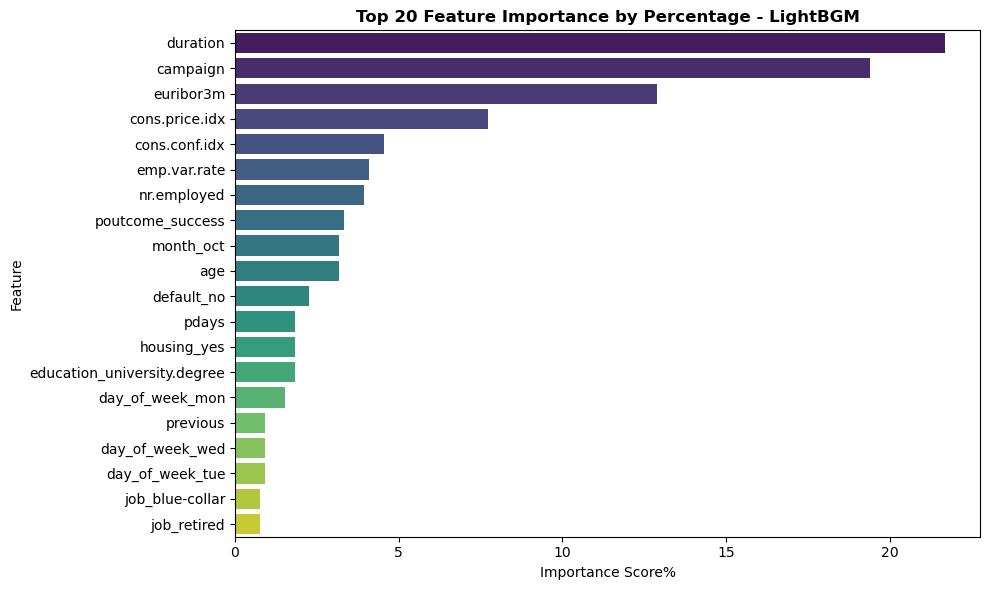

In [99]:
import seaborn as sns
from xgboost import plot_importance

# plot_importance(model1, max_num_features=20, height=0.5)
# plt.title("Top 20 Feature Importance - XGBoost")
# plt.tight_layout()
# plt.show()

importances = final_model.feature_importances_
feature_names = X_processed_final.columns

# Convert to DataFrame
importance_df = pd.DataFrame({
    'Feature':feature_names,
    'Importance':importances
})

# Convert to percentage%
importance_df['Importance'] = (
    importance_df['Importance'] / importance_df['Importance'].sum() * 100
).round(2)

# Top 20 features
top_20 = importance_df.sort_values(by='Importance', ascending=False).head(20)

# Visualition
plt.figure(figsize=(10, 6))
sns.barplot(data=top_20, x='Importance', y='Feature', palette='viridis')
plt.title("Top 20 Feature Importance by Percentage - LightBGM", fontweight='bold')
plt.xlabel("Importance Score%")
plt.ylabel("Feature")
plt.tight_layout()

plt.show()

1. *`duration`* (call length) accounts for about 23% of the total feature importance - the model ehavily relies on this variable.
2. *`campaign`* and `*euribor3m*` (whether a previous campaign was successful) also play large roles in predicting term deposit subscription.

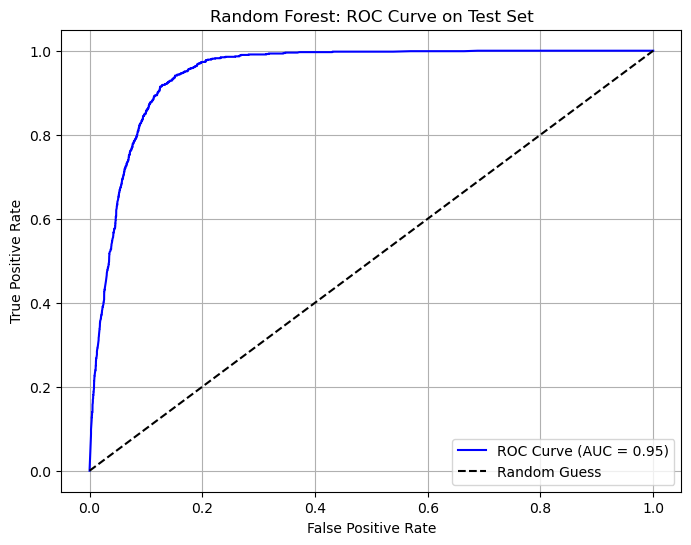

In [100]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Get False Positive Rate (fpr), True Positive Rate (fpr), and thresholds
y_proba_test = final_model.predict_proba(X_processed_test)[:, 1]

# 2. Calculate the Area Under the Curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)

# 3. Calculate AUC
roc_auc = auc(fpr, tpr)

# 3. Plot ROC(XGBoost) Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest: ROC Curve on Test Set')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

In [101]:
cv_results_RF = pd.DataFrame({
    'Fold':np.arange(1, len(f1_scores2) + 1),
    'F1 Score': f1_scores2,
    'Recall': recall_scores2,
    'ROC AUC': roc_auc_scores2
})

# Add an overall average in the the last row
cv_results_RF.loc['Average'] = [
    '-',
    np.mean(f1_scores2),
    np.mean(recall_scores2),
    np.mean(roc_auc_scores2)
]

print(cv_results_RF)

        Fold  F1 Score    Recall   ROC AUC
0          1  0.640849  0.714485  0.947011
1          2  0.613350  0.678273  0.940631
2          3  0.617035  0.681058  0.939168
3          4  0.636305  0.690808  0.939842
4          5  0.616071  0.672702  0.938787
Average    -  0.624722  0.687465  0.941088


Since the objective is to predict whether a client will subscribe to a term deposit (variable y), missing potential subscribers could be costly. Therefore, the 4-fold - with a recall of 0.6945 and ROC AUC of 0.9428 offers the best performance among all five.